Import bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Wczytanie danych

In [2]:
dane = pd.read_csv('dane.csv', sep = ';', decimal = ',',
                   index_col=0)

Zadanie 1. Korzystając z danych znajdujących się w pliku dane.csv wczytaj dane a nastepnie stwórz
nową kolumnę Sprzedaz calkowita. Następnie utworz nową ramkę danych (sprzedaz) bez
kolumn sprzedaży poszczególnych produktów.
Wyświelt sprzedaż całkowitą za pomocą wykresu liniowego, przykład:

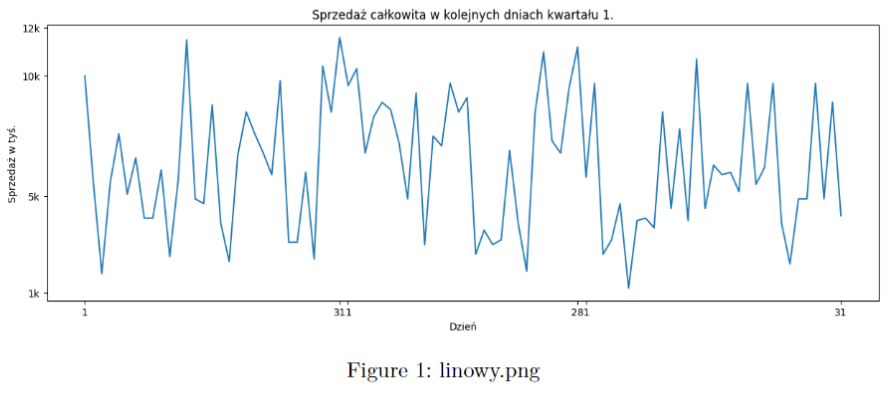

Utworzenie kolumny sprzedaz calkowita (dodanie prodA i prodB), utworzenie nowej ramki danych bez danych produkcji. Dodatkowo pogrupowanie miesięcy w dobrej kolejności

In [3]:
dane['Sprzedaz calkowita'] = dane['prodA'] + dane['prodB']

In [4]:
kolejnoscMiesiecy = {'styczen': 1, 'luty': 2, 'marzec': 3}
dane['Miesiac'] = pd.Categorical(dane['Miesiac'], categories=kolejnoscMiesiecy.keys(), ordered=True)
dane_posortowane = dane.sort_values(by=['Miesiac', 'dzien'])
dane_posortowane.reset_index(drop=True, inplace=True)

In [5]:
sprzedaz = dane_posortowane[['dzien', 'Miesiac', 'Sprzedaz calkowita']].copy()
sprzedaz.describe

<bound method NDFrame.describe of     dzien  Miesiac  Sprzedaz calkowita
0       1  styczen                10.0
1       2  styczen                 5.6
2       3  styczen                 1.8
3       4  styczen                 5.6
4       5  styczen                 7.6
..    ...      ...                 ...
85     27   marzec                 4.9
86     28   marzec                 9.7
87     29   marzec                 4.9
88     30   marzec                 8.9
89     31   marzec                 4.2

[90 rows x 3 columns]>

Utworzenie analogicznego wykresu

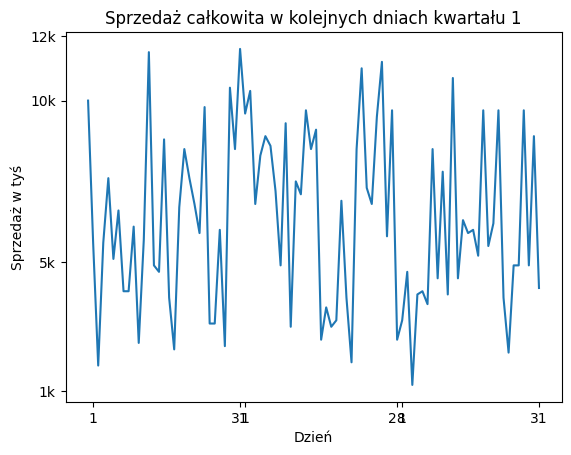

In [6]:
plt.plot(sprzedaz.index, sprzedaz['Sprzedaz calkowita'])
plt.title('Sprzedaż całkowita w kolejnych dniach kwartału 1')
plt.xlabel('Dzień')
plt.ylabel('Sprzedaż w tyś')
yticksy = (1, 5, 10, 12)
yticksy_labels = ('1k', '5k', '10k', '12k')
xticks_positions = [1, 30, 31, 61, 62, 89] 
xticks_labels = ['1', '31', '1', '28', '1', '31']  
plt.xticks(xticks_positions, xticks_labels)
plt.xticks()
plt.yticks(yticksy, yticksy_labels)
plt.show()

Zadanie 2. Z ramki sprzedaz usuń dane z lutego

In [7]:
sprzedaz = sprzedaz[sprzedaz['Miesiac'] != 'luty']

kolejnoscMiesiecy2 = {'styczen': 1, 'marzec': 2} 

sprzedaz['Miesiac'] = pd.Categorical(sprzedaz['Miesiac'], categories=kolejnoscMiesiecy2.keys(), ordered=True)

C:\Users\cwiek\AppData\Local\Temp\ipykernel_21692\4199628395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sprzedaz['Miesiac'] = pd.Categorical(sprzedaz['Miesiac'], categories=kolejnoscMiesiecy2.keys(), ordered=True)


a) A następnie przygotuj zestawienie:

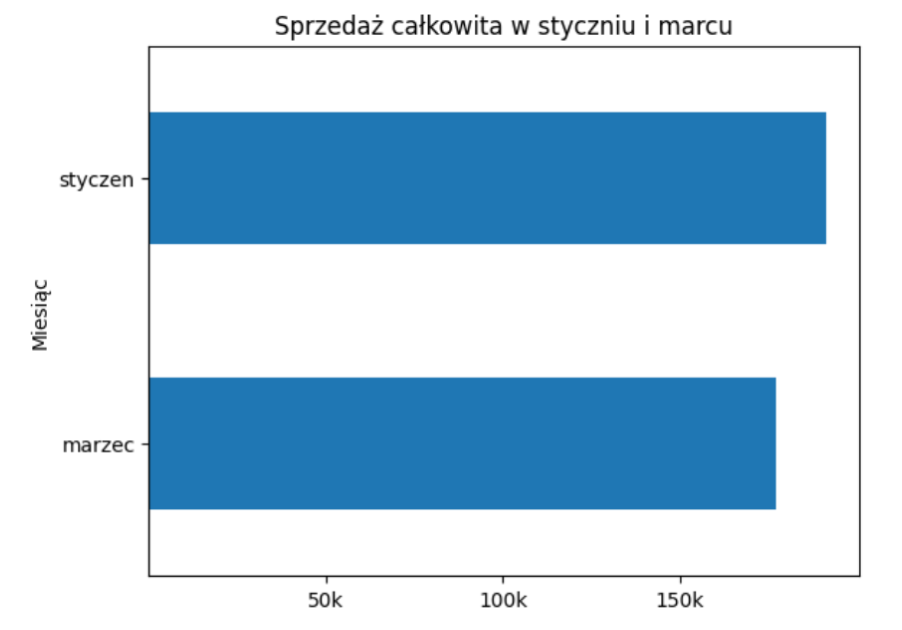

In [8]:
sprzedaz_cal = sprzedaz.groupby(['Miesiac'])['Sprzedaz calkowita'].sum()
sprzedaz_cal.describe

C:\Users\cwiek\AppData\Local\Temp\ipykernel_21692\2942558314.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sprzedaz_cal = sprzedaz.groupby(['Miesiac'])['Sprzedaz calkowita'].sum()


<bound method NDFrame.describe of Miesiac
styczen    191.3
marzec     177.1
Name: Sprzedaz calkowita, dtype: float64>

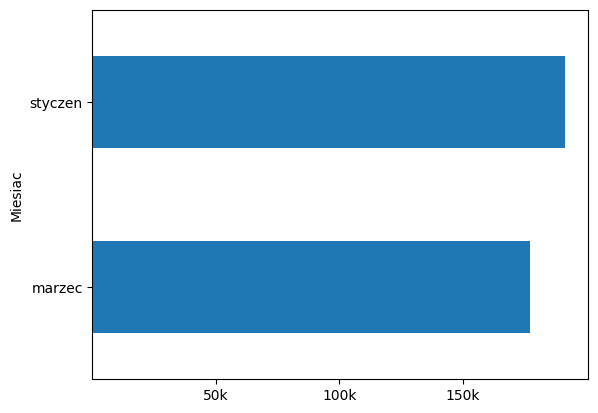

In [9]:
sprzedaz_cal.plot.barh()
xticks_positions = [50, 100, 150]  # Your desired tick positions
xticks_labels = ['50k', '100k', '150k']  # Your desired tick labels
plt.xticks(xticks_positions, xticks_labels)
plt.gca().invert_yaxis()
plt.show()

b) A następnie przygotuj zestawienie:

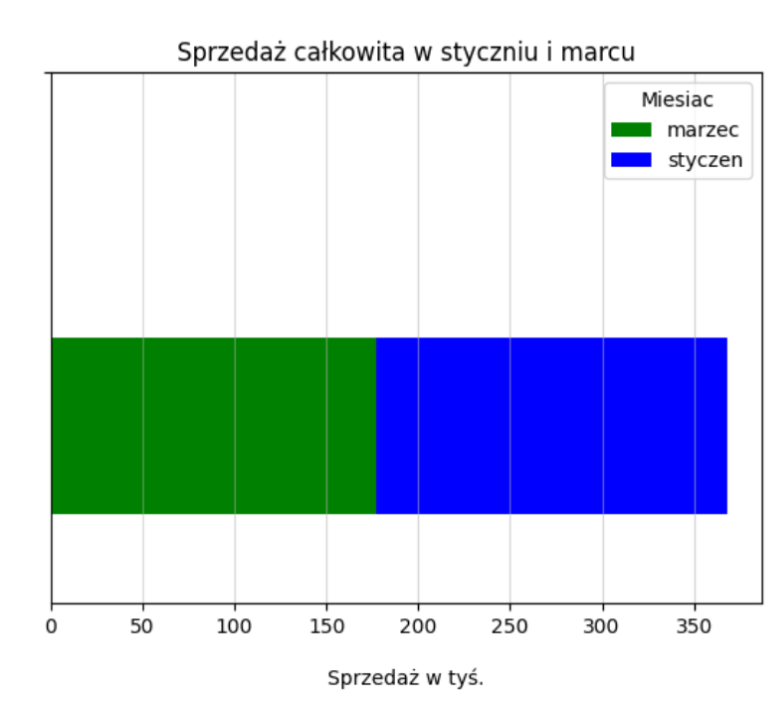

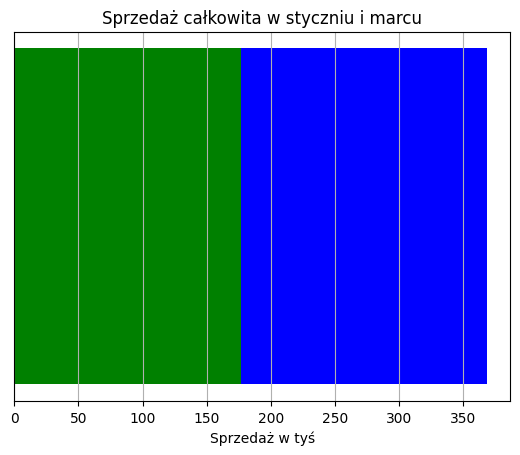

In [10]:
sprzedaz_marzec = sprzedaz[sprzedaz['Miesiac'] == 'marzec']['Sprzedaz calkowita'].sum()
sprzedaz_styczen = sprzedaz[sprzedaz['Miesiac'] == 'styczen']['Sprzedaz calkowita'].sum() + sprzedaz_marzec

plt.barh('styczen i marzec', [sprzedaz_styczen, sprzedaz_marzec], color=['blue', 'green'])
plt.title('Sprzedaż całkowita w styczniu i marcu')
plt.xlabel('Sprzedaż w tyś')
plt.ylabel('Total Sales')
plt.grid('x')
plt.gca().yaxis.set_visible(False)
plt.show()

Zadanie 3. Korzystając z ramki dane dla sprzedaży z marca wyświetl kolumny sprzedaży produktów A i
B, wiersze uporządkuj malejąco dla produktu A. Wyniki przedstaw na wykresie punktowym.

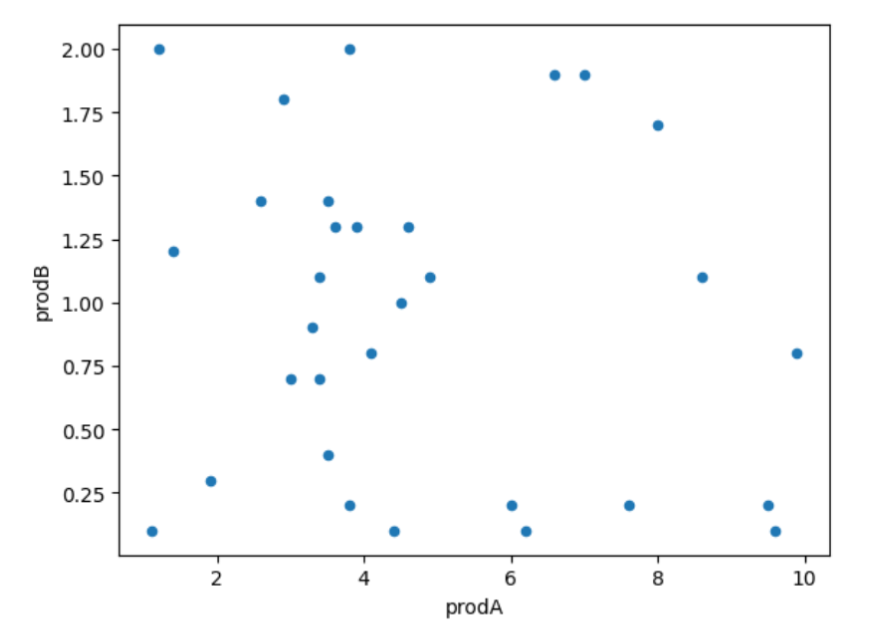

In [11]:
sprzedaz_marzec = dane[dane['Miesiac'] == 'marzec']
sprzedaz_marzec = sprzedaz_marzec.sort_values(by='prodA', ascending=False)
podsumowanie = sprzedaz_marzec[['prodA', 'prodB']].describe

print(podsumowanie)

<bound method NDFrame.describe of     prodA  prodB
41    9.9    0.8
55    9.6    0.1
47    9.5    0.2
50    8.6    1.1
29    8.0    1.7
39    7.6    0.2
57    7.0    1.9
37    6.6    1.9
43    6.2    0.1
49    6.0    0.2
45    4.9    1.1
44    4.6    1.3
48    4.5    1.0
38    4.4    0.1
56    4.1    0.8
46    3.9    1.3
28    3.8    2.0
34    3.8    0.2
54    3.6    1.3
51    3.5    0.4
53    3.5    1.4
42    3.4    1.1
35    3.4    0.7
58    3.3    0.9
36    3.0    0.7
32    2.9    1.8
40    2.6    1.4
52    1.9    0.3
30    1.4    1.2
31    1.2    2.0
33    1.1    0.1>


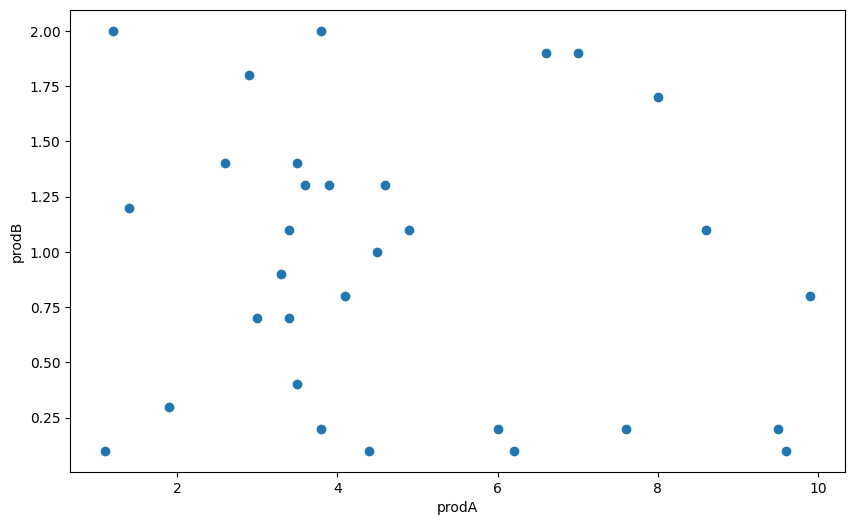

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(sprzedaz_marzec['prodA'], sprzedaz_marzec['prodB'])
plt.xlabel('prodA')
plt.ylabel('prodB')
plt.show()

Zadanie 4. Korzystając z ramki dane wyświetl informacje o miesiącu i sprzedaży produktu A większej od średniej sprzedaży tego produktu wyniki uporządkuj po miesiącu zachowując porządek zgodny z kolejnością miesięcy a w obrębie miesiąca po wielkości sprzedaży. Zlicz ile było dni ze sprzedażą powyżej średniej, wyniki przedstaw na wykresie

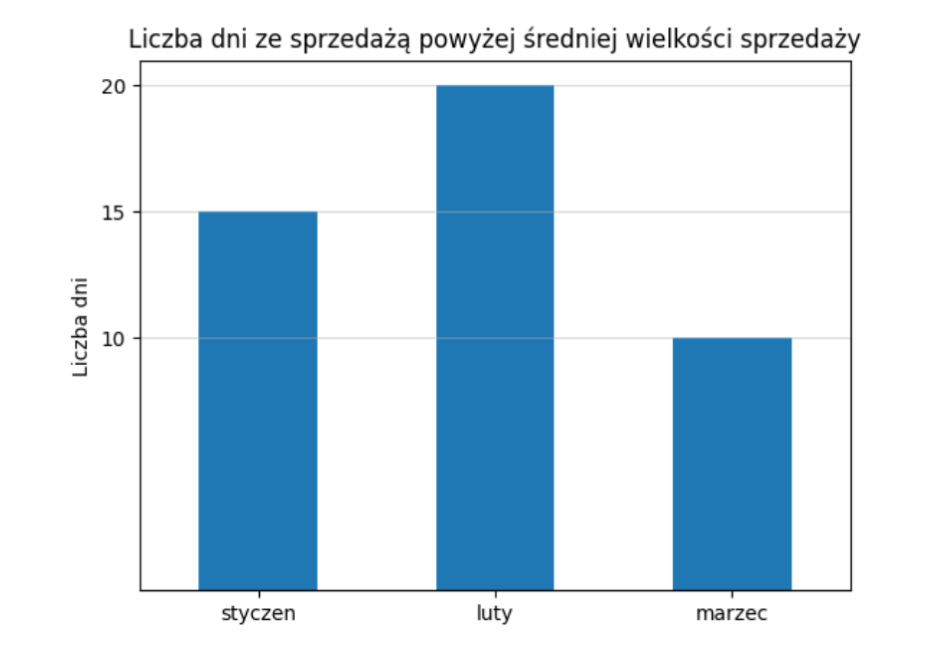

In [13]:
sprzedaz = dane_posortowane[['dzien', 'Miesiac', 'prodA']].copy()
sprzedaz_wieksza_od_sredniej = sprzedaz[sprzedaz['prodA'] > sprzedaz['prodA'].mean()]
sprzedaz_wieksza_od_sredniej.describe

<bound method NDFrame.describe of     dzien  Miesiac  prodA
0       1  styczen    9.2
1       2  styczen    5.5
3       4  styczen    5.5
4       5  styczen    7.0
6       7  styczen    5.4
12     13  styczen    9.6
15     16  styczen    8.6
18     19  styczen    6.0
19     20  styczen    8.0
20     21  styczen    7.2
21     22  styczen    6.1
23     24  styczen    9.2
28     29  styczen    8.6
29     30  styczen    7.0
30     31  styczen    9.6
31      1     luty    8.2
32      2     luty    9.9
33      3     luty    6.1
34      4     luty    6.4
35      5     luty    8.2
36      6     luty    8.0
37      7     luty    5.5
39      9     luty    8.4
41     11     luty    7.4
42     12     luty    5.9
43     13     luty    7.8
44     14     luty    7.5
45     15     luty    7.4
50     20     luty    5.5
53     23     luty    6.6
54     24     luty    9.0
55     25     luty    6.3
56     26     luty    6.5
57     27     luty    8.2
58     28     luty    9.3
60      2   marzec    8.0
68  

In [14]:
sortowane = sprzedaz_wieksza_od_sredniej.sort_values(['Miesiac', 'prodA'])
sortowane.describe

<bound method NDFrame.describe of     dzien  Miesiac  prodA
6       7  styczen    5.4
1       2  styczen    5.5
3       4  styczen    5.5
18     19  styczen    6.0
21     22  styczen    6.1
4       5  styczen    7.0
29     30  styczen    7.0
20     21  styczen    7.2
19     20  styczen    8.0
15     16  styczen    8.6
28     29  styczen    8.6
0       1  styczen    9.2
23     24  styczen    9.2
12     13  styczen    9.6
30     31  styczen    9.6
37      7     luty    5.5
50     20     luty    5.5
42     12     luty    5.9
33      3     luty    6.1
55     25     luty    6.3
34      4     luty    6.4
56     26     luty    6.5
53     23     luty    6.6
41     11     luty    7.4
45     15     luty    7.4
44     14     luty    7.5
43     13     luty    7.8
36      6     luty    8.0
31      1     luty    8.2
35      5     luty    8.2
57     27     luty    8.2
39      9     luty    8.4
54     24     luty    9.0
58     28     luty    9.3
32      2     luty    9.9
80     22   marzec    6.0
74  

In [15]:
grupowane = sortowane.groupby(['Miesiac'])['dzien'].count()

C:\Users\cwiek\AppData\Local\Temp\ipykernel_21692\2820116299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupowane = sortowane.groupby(['Miesiac'])['dzien'].count()


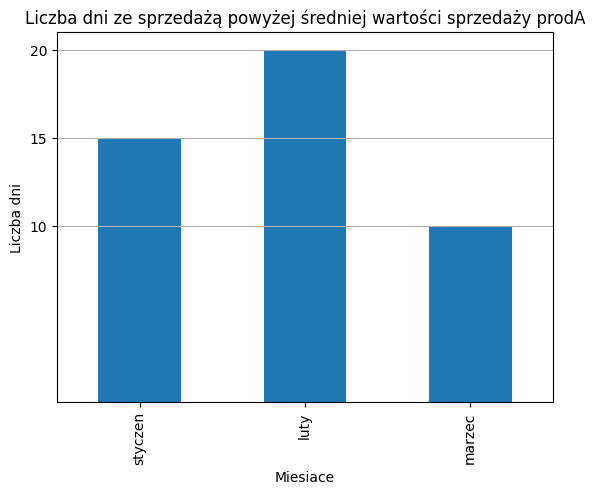

In [16]:
grupowane.plot.bar()
yticksy = (10, 15, 20)
plt.yticks(yticksy)
plt.title('Liczba dni ze sprzedażą powyżej średniej wartości sprzedaży prodA')
plt.xlabel('Miesiace')
plt.ylabel('Liczba dni')
plt.grid(True, axis = 'y')
plt.show()

Zadanie 5. Korzystając z ramki dane wyznacz sumaryczną sprzedaż dla produktów w każdym miesiącu,
wyniki przedstaw na wykresie.

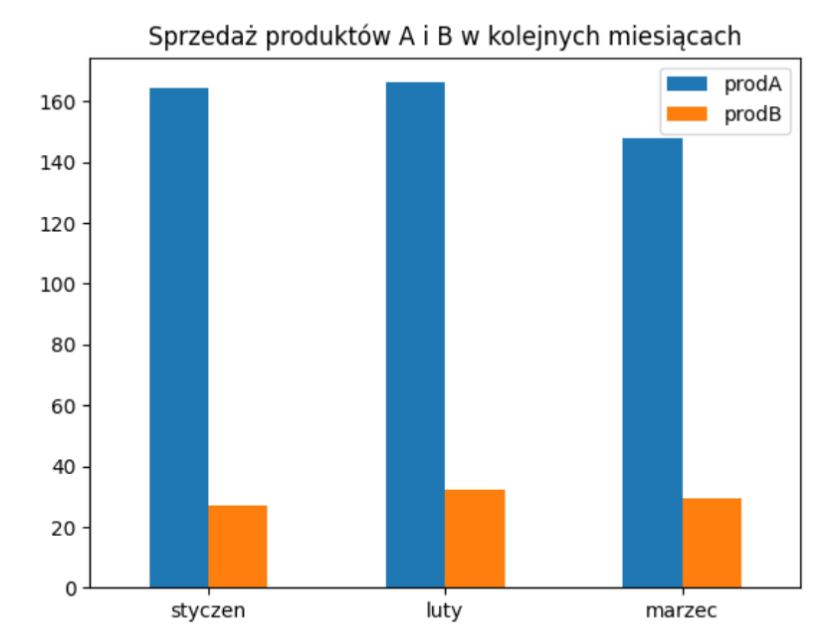

In [17]:
sprzedaz = dane_posortowane[['dzien', 'Miesiac', 'prodA', 'prodB']].copy()
sumaprod = sprzedaz.groupby(['Miesiac'])[['prodA', 'prodB']].sum()
display(sumaprod)


C:\Users\cwiek\AppData\Local\Temp\ipykernel_21692\2102583255.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sumaprod = sprzedaz.groupby(['Miesiac'])[['prodA', 'prodB']].sum()


,prodA,prodB
Miesiac,,
styczen,164.4,26.9
luty,166.1,32.1
marzec,147.8,29.3


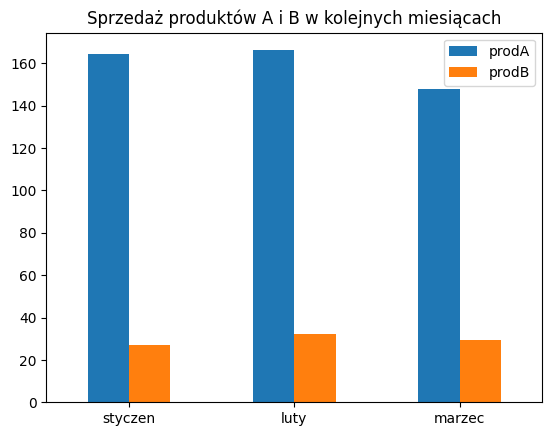

In [18]:
sumaprod.plot.bar()
plt.legend()
plt.title('Sprzedaż produktów A i B w kolejnych miesiącach')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()


Zadanie 6. Przygotuj wykres przezentujący sprzedaż produktu B w kolejnych dniach kwartału 1. z oz-
naczeniem dni w których sprzedaż była maksymalna

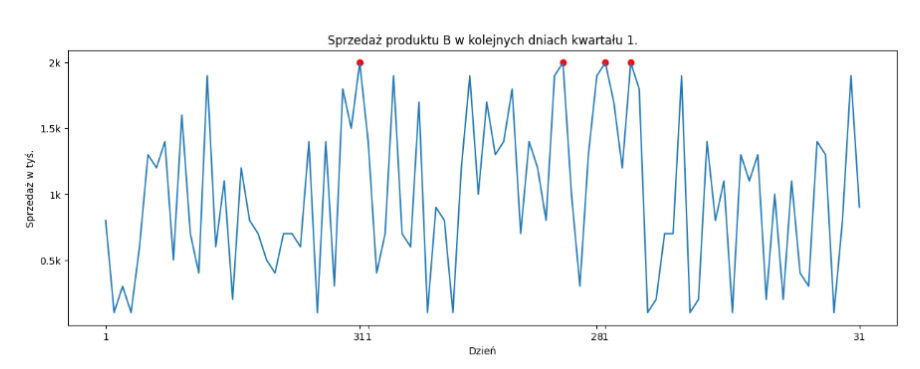

In [19]:
punkty = sprzedaz.index[sprzedaz['prodB'] == sprzedaz['prodB'].max()]
print(punkty)

Index([30, 54, 59, 62], dtype='int64')


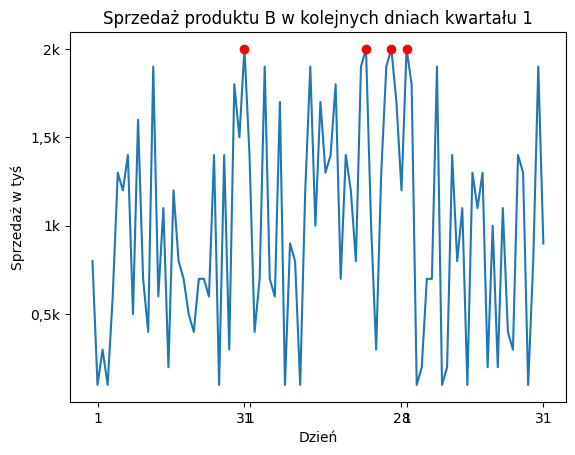

In [20]:
plt.plot(sprzedaz.index, sprzedaz['prodB'])
plt.plot(punkty, sprzedaz.loc[punkty, 'prodB'], 'ro')
plt.title('Sprzedaż produktu B w kolejnych dniach kwartału 1')
plt.xlabel('Dzień')
plt.ylabel('Sprzedaż w tyś')
yticksy = (0.5, 1, 1.5, 2)
yticksy_labels = ('0,5k', '1k', '1,5k', '2k')
xticks_positions = [1, 30, 31, 61, 62, 89] 
xticks_labels = ['1', '31', '1', '28', '1', '31']  
plt.xticks(xticks_positions, xticks_labels)
plt.xticks()
plt.yticks(yticksy, yticksy_labels)
plt.show()